In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
sns.set_style('darkgrid')
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

In [36]:
df_ind = pd.read_csv('ANLSYS2/FITFULL/ACT4_all.csv',index_col = 0)

In [37]:
df_ind.head()

,Lambda,Max_act,iter,speed,speed_std,persistance,std_persit
0,2800.0,40.0,0,NaN,NaN,NaN,NaN
1,2800.0,40.0,1,NaN,NaN,NaN,NaN
2,3800.0,40.0,0,5.690693,1.638900,52.109640,31.550481
3,3800.0,40.0,1,5.690861,1.710194,47.455775,31.909463
4,2400.0,30.0,0,6.264524,1.552426,52.815727,29.741210


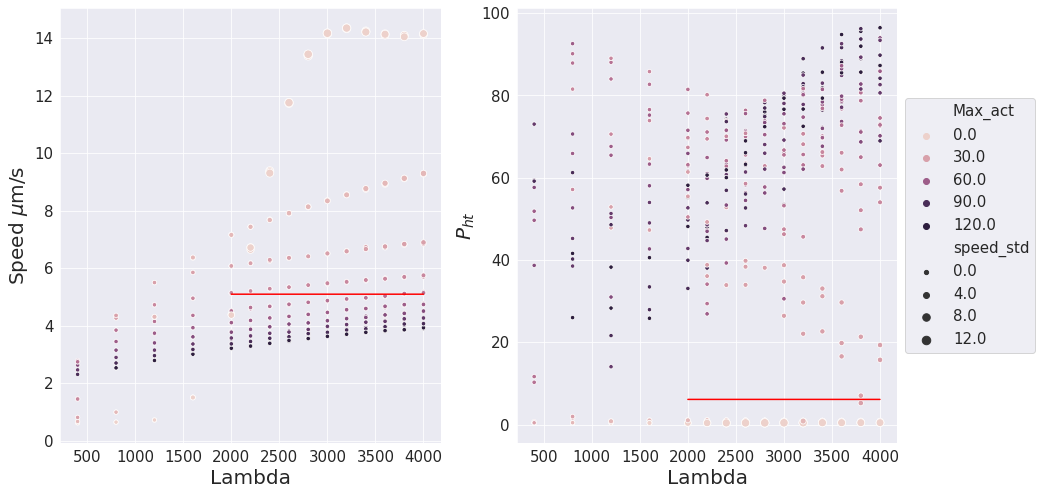

In [38]:
# Plot
# lambda vs speed,persist
f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,8))
sns.scatterplot(x = 'Lambda',y = 'speed', hue = 'Max_act',size = 'speed_std',data = df_ind, ax = ax1,legend = False)
sns.scatterplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',size = 'speed_std',data = df_ind, ax = ax2, legend = 'brief')
#sns.scatterplot(x = 'Lambda',y = 'pooled_pers',hue = 'Max_act',data = ZOOM_act, ax = ax3, legend = 'full')

#sns.lineplot(x = 'Lambda',y = 'speed', hue = 'Max_act',data = ZOOM_prfdr, ax = ax1,legend = 'full')
#sns.lineplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',data = ZOOM_prfdr, ax = ax2, legend = 'full')
ax1.plot(range(2000,4000),[5.10] * 2000,c = 'r')
# ax2.plot(range(0,3000),[3.84] * 3000,c = 'r')
ax2.plot(range(2000,4000),[6.15] * 2000,c = 'r')

ax1.set_ylabel('Speed $\mu$m/s',fontsize = 20)
ax1.set_xlabel('Lambda',fontsize = 20)

ax2.set_ylabel('$P_{ht}$',fontsize = 20)
ax2.set_xlabel('Lambda',fontsize = 20)
# ax1.legend(fontsize = 15)
ax2.legend(fontsize = 15,loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [39]:
def cumul_err(x):
    # unpack : 
    speed = x[0]
    uspeed = x[1]
    lspeed = x[2]
    pers = x[3]

    
    s_ = 5.104099
    p_ = 6.146018
    
    cum_err = abs(s_ - speed) + abs(s_ - uspeed) + abs(s_ - lspeed) + abs(p_ - pers)
    return cum_err

merged = df_ind
merged['upper_speed'] = merged.speed + merged.speed_std
merged['lower_speed'] = merged.speed - merged.speed_std

merged['Error'] = merged[['speed','upper_speed','lower_speed','persistance']].apply(cumul_err,axis = 1)
# find minumum :
merged = merged.dropna()
min_err = min(merged.Error)
opt_params = merged[merged.Error == min_err]#[['Lambda','Max_act','Error']]
opt_params.head()

,Lambda,Max_act,iter,speed,speed_std,persistance,std_persit,upper_speed,lower_speed,Error
91,800.0,30.0,1,4.361762,1.172268,1.988446,0.954883,5.53403,3.189494,7.244445


In [40]:
x = merged[merged.Lambda == 800.0]
x = x[x.Max_act == 30.]
x.head()

,Lambda,Max_act,iter,speed,speed_std,persistance,std_persit,upper_speed,lower_speed,Error
90,800.0,30.0,0,4.273740,1.193281,1.692354,0.185238,5.467021,3.080459,7.670586
91,800.0,30.0,1,4.361762,1.172268,1.988446,0.954883,5.534030,3.189494,7.244445


In [41]:
# sum over same lambda max act combis
# params = pd.MultiIndex.from_frame(merged[['Lambda','Max_act']])
# merged.mean(axis = 0,level = params)
rows = []
#print(merged[['Lambda','Max_act']].to_numpy())
parameters = np.unique(merged[['Lambda','Max_act']].to_numpy(),axis = 0)
#print(parameters)
for params in parameters:
    print(params)
    x = merged[merged.Lambda == params[0]]
    x = x[x.Max_act == params[1]]
    rows.append(x.mean().to_numpy())

[400.  10.]
[400.  20.]
[400.  30.]
[400.  40.]
[400.  50.]
[400.  60.]
[400.  70.]
[400.  80.]
[400.  90.]
[800.  10.]
[800.  20.]
[800.  30.]
[800.  40.]
[800.  50.]
[800.  60.]
[800.  70.]
[800.  80.]
[800.  90.]
[800. 100.]
[1200.   10.]
[1200.   20.]
[1200.   30.]
[1200.   40.]
[1200.   50.]
[1200.   60.]
[1200.   70.]
[1200.   80.]
[1200.   90.]
[1200.  100.]
[1600.   10.]
[1600.   20.]
[1600.   30.]
[1600.   40.]
[1600.   50.]
[1600.   60.]
[1600.   70.]
[1600.   80.]
[1600.   90.]
[1600.  100.]
[2000.   10.]
[2000.   20.]
[2000.   30.]
[2000.   40.]
[2000.   50.]
[2000.   60.]
[2000.   70.]
[2000.   80.]
[2000.   90.]
[2000.  100.]
[2200.   10.]
[2200.   20.]
[2200.   30.]
[2200.   40.]
[2200.   50.]
[2200.   60.]
[2200.   70.]
[2200.   80.]
[2200.   90.]
[2200.  100.]
[2400.   10.]
[2400.   20.]
[2400.   30.]
[2400.   40.]
[2400.   50.]
[2400.   60.]
[2400.   70.]
[2400.   80.]
[2400.   90.]
[2400.  100.]
[2600.   10.]
[2600.   20.]
[2600.   30.]
[2600.   40.]
[2600.   50.]
[2

In [26]:
meanDF = pd.DataFrame(data = rows,columns = merged.columns)
min_err = min(meanDF.Error)
opt_params = meanDF[meanDF.Error == min_err]#[['Lambda','Max_act','Error']]
opt_params.head()

,Lambda,Max_act,iter,speed,speed_std,persistance,std_persit,upper_speed,lower_speed,Error
11,800.0,30.0,0.5,4.317751,1.182775,1.8404,0.570061,5.500525,3.134976,7.457516


In [28]:
df_ind = pd.read_csv('ANLSYS2/FITFULL/PRFDR3_all.csv',index_col = 0)
df_ind

,Lambda,Max_act,iter,speed,speed_std,persistance,std_persit
0,500.0,0.20,0,3.131868,0.881229,0.864565,0.053626
1,500.0,0.20,1,3.132724,0.899844,0.865765,0.055661
2,500.0,0.60,0,3.212474,0.873404,1.040059,0.104182
3,500.0,0.60,1,3.222037,0.892437,1.065288,0.115245
4,200.0,0.18,0,1.550536,0.792090,0.523648,0.022210
...,...,...,...,...,...,...,...
181,500.0,0.80,2,3.455521,0.854581,6.523871,12.259097
182,400.0,0.12,2,NaN,NaN,NaN,NaN
183,400.0,0.30,2,NaN,NaN,NaN,NaN
184,1000.0,0.12,2,NaN,NaN,NaN,NaN


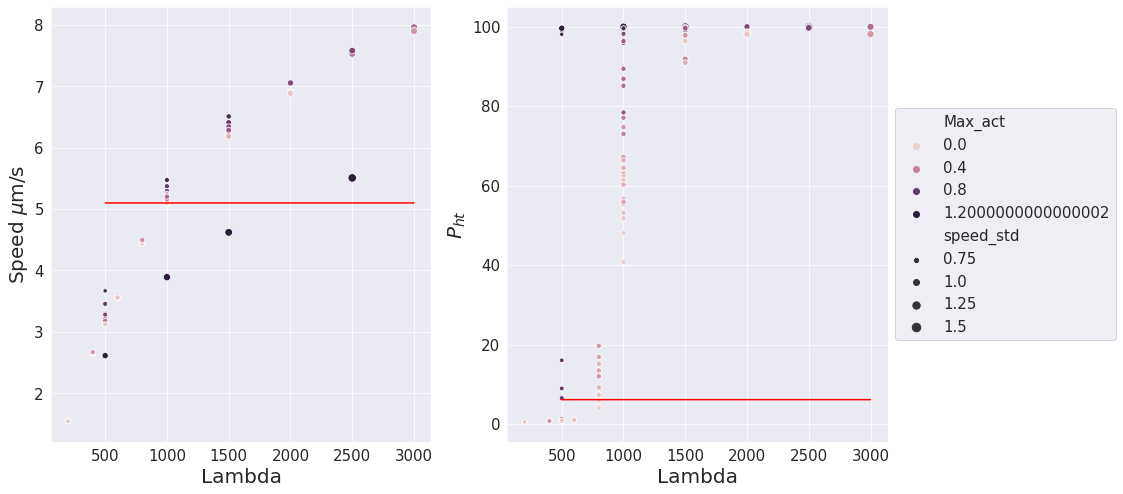

In [29]:
# Plot
# lambda vs speed,persist
f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,8))
sns.scatterplot(x = 'Lambda',y = 'speed', hue = 'Max_act',size = 'speed_std',data = df_ind, ax = ax1,legend = False)
sns.scatterplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',size = 'speed_std',data = df_ind, ax = ax2, legend = 'brief')
#sns.scatterplot(x = 'Lambda',y = 'pooled_pers',hue = 'Max_act',data = ZOOM_act, ax = ax3, legend = 'full')

#sns.lineplot(x = 'Lambda',y = 'speed', hue = 'Max_act',data = ZOOM_prfdr, ax = ax1,legend = 'full')
#sns.lineplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',data = ZOOM_prfdr, ax = ax2, legend = 'full')
ax1.plot(range(500,3000),[5.10] * 2500,c = 'r')
# ax2.plot(range(0,3000),[3.84] * 2500,c = 'r')
ax2.plot(range(500,3000),[6.15] * 2500,c = 'r')
ax1.set_ylabel('Speed $\mu$m/s',fontsize = 20)
ax1.set_xlabel('Lambda',fontsize = 20)

ax2.set_ylabel('$P_{ht}$',fontsize = 20)
ax2.set_xlabel('Lambda',fontsize = 20)
# ax1.legend(fontsize = 15)
ax2.legend(fontsize = 15,loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.show()

In [32]:
merged = df_ind
merged['upper_speed'] = merged.speed + merged.speed_std
merged['lower_speed'] = merged.speed - merged.speed_std

merged['Error'] = merged[['speed','upper_speed','lower_speed','persistance']].apply(cumul_err,axis = 1)
# find minumum :
merged = merged.dropna()
min_err = min(merged.Error)
opt_params = merged[merged.Error == min_err]#[['Lambda','Max_act','Error']]
opt_params.head()

,Lambda,Max_act,iter,speed,speed_std,persistance,std_persit,upper_speed,lower_speed,Error
48,800.0,0.06,0,4.432513,0.898686,5.96403,11.957524,5.331199,3.533827,2.650946


In [33]:
# sum over same lambda max act combis
# params = pd.MultiIndex.from_frame(merged[['Lambda','Max_act']])
# merged.mean(axis = 0,level = params)
rows = []
#print(merged[['Lambda','Max_act']].to_numpy())
parameters = np.unique(merged[['Lambda','Max_act']].to_numpy(),axis = 0)
#print(parameters)
for params in parameters:
    print(params)
    x = merged[merged.Lambda == params[0]]
    x = x[x.Max_act == params[1]]
    rows.append(x.mean().to_numpy())

[2.e+02 6.e-02]
[2.0e+02 1.2e-01]
[2.0e+02 1.8e-01]
[200.     0.24]
[200.    0.3]
[4.e+02 6.e-02]
[4.0e+02 1.2e-01]
[4.0e+02 1.8e-01]
[4.0e+02 2.4e-01]
[4.e+02 3.e-01]
[5.e+02 1.e-01]
[5.e+02 2.e-01]
[5.e+02 3.e-01]
[5.e+02 4.e-01]
[500.    0.5]
[500.    0.6]
[500.    0.7]
[500.    0.8]
[500.    0.9]
[500.   1.]
[6.e+02 6.e-02]
[6.0e+02 1.2e-01]
[6.0e+02 1.8e-01]
[6.0e+02 2.4e-01]
[6.e+02 3.e-01]
[8.e+02 6.e-02]
[8.0e+02 1.2e-01]
[8.0e+02 1.8e-01]
[8.0e+02 2.4e-01]
[8.e+02 3.e-01]
[1.e+03 6.e-02]
[1.e+03 1.e-01]
[1.0e+03 1.2e-01]
[1.0e+03 1.8e-01]
[1.e+03 2.e-01]
[1.0e+03 2.4e-01]
[1.e+03 3.e-01]
[1.e+03 3.e-01]
[1.e+03 4.e-01]
[1.e+03 5.e-01]
[1.e+03 6.e-01]
[1.e+03 7.e-01]
[1.e+03 8.e-01]
[1.e+03 9.e-01]
[1000.    1.]
[1.5e+03 1.0e-01]
[1.5e+03 2.0e-01]
[1.5e+03 3.0e-01]
[1.5e+03 4.0e-01]
[1.5e+03 5.0e-01]
[1.5e+03 6.0e-01]
[1.5e+03 7.0e-01]
[1.5e+03 8.0e-01]
[1.5e+03 9.0e-01]
[1.5e+03 1.0e+00]
[2.e+03 1.e-01]
[2.e+03 7.e-01]
[2.5e+03 5.0e-01]
[2.5e+03 7.0e-01]
[2.5e+03 1.0e+00]
[3.e

In [34]:
meanDF = pd.DataFrame(data = rows,columns = merged.columns)
min_err = min(meanDF.Error)
opt_params = meanDF[meanDF.Error == min_err]#[['Lambda','Max_act','Error']]
opt_params.head()

,Lambda,Max_act,iter,speed,speed_std,persistance,std_persit,upper_speed,lower_speed,Error
25,800.0,0.06,0.5,4.437865,0.911618,5.055117,9.485128,5.349483,3.526247,3.580371
